In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data_dir = '..\csv_klinischeDaten\csv_klinischeDaten\Konstante_u_fortlaufende_Daten_identifier-nur-ID'

import os

os.path.isdir(data_dir)

True

In [3]:
G = nx.Graph()

In [4]:
# idea: for every csv file in the data directory, extract the first row (the specifiers) and
# create a node for each distinct column name. In the end, implement edges


from os import listdir
from os.path import isfile, join

filenames = [f for f in listdir(data_dir) if isfile(join(data_dir, f)) and f.endswith('.csv')]

In [5]:
DELIMITER = '\t'
unique_colnames = set()

for filename in filenames:
    
    # read first line of csv file
    
    with open(join(data_dir, filename), 'r') as current_file:
        list_of_column_names = current_file.readline().split(DELIMITER)
        if len(list_of_column_names) > 0:
            
            # deleting the \n in the column descriptor
            list_of_column_names[-1] = list_of_column_names[-1][:-1]
            
        unique_colnames.update(list_of_column_names)

In [6]:
unique_colnames.remove('usubjid')
unique_colnames.remove('visdat')

In [7]:
G.add_node('usubjid')
G.add_node('visdat')
G.add_edge('usubjid', 'visdat')

for col in unique_colnames:
    G.add_node(col)
    G.add_edge(col, 'visdat')

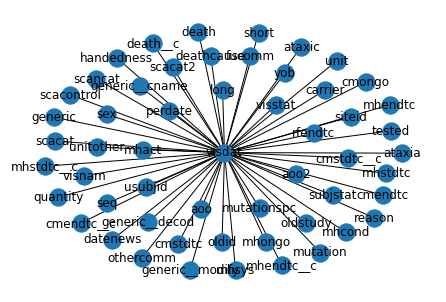

In [8]:
nx.draw(G, with_labels=True)

In [9]:
# TODO: Think of a better layout to represent the graph.
unique_colnames

{'aoo',
 'aoo2',
 'ataxia',
 'ataxic',
 'carrier',
 'cmendtc',
 'cmendtc__c',
 'cmongo',
 'cmstdtc',
 'cmstdtc__c',
 'datenews',
 'death',
 'death__c',
 'deathcause',
 'fucomm',
 'generic',
 'generic__cname',
 'generic__decod',
 'generic__modify',
 'handedness',
 'long',
 'mhact',
 'mhcond',
 'mhendtc',
 'mhendtc__c',
 'mhongo',
 'mhstdtc',
 'mhstdtc__c',
 'mhsys',
 'mutation',
 'mutationspc',
 'oldid',
 'oldstudy',
 'othercomm',
 'perdate',
 'quantity',
 'reason',
 'rfendtc',
 'scacat',
 'scacat2',
 'scacontrol',
 'scancat',
 'seq',
 'sex',
 'short',
 'siteid',
 'subjstat',
 'tested',
 'unit',
 'unitother',
 'visnam',
 'visstat',
 'yob'}

![Schema](schema.png "Schema of gathered data as 'per subject' view")